# RNN Implementation using NumPy
 

使用numpy 实现一个简单的RNN 网络模型， 用来学习RNN 的前向传播和反向转播过程 . 
下面的例子是一个多对一问题， 通过前面多个字符，预测后一个字符。 

RNN多对一 适合解决文本分类，时间序列的预测问题。 




### 参考文档
* [循环神经网络RNN介绍](https://zhuanlan.zhihu.com/p/32755043)

* [用「动图」和「举例子」讲讲 RNN](https://zhuanlan.zhihu.com/p/36455374)


### 计算原理和公式


![image](https://dikers-data.s3.cn-northwest-1.amazonaws.com.cn/images/rnn_simple.png)

![image](https://pic1.zhimg.com/80/v2-4058db6817f202ddc3fc41cb3683a744_1440w.png)
![image](https://pic1.zhimg.com/80/v2-a2ba1b9625a25a9f3c4a16acba069e50_1440w.png)





## 激活函数


### sigmod 函数
$ h(x) = \frac{1} {1+ exp(-x)} $

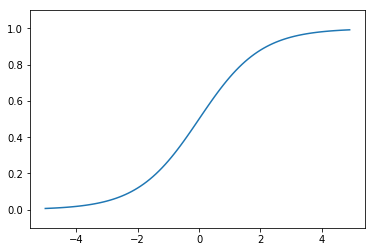

In [11]:
def sigmoid(x):
    return 1/ (1+np.exp(-x))

x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

### tanh 激活函数

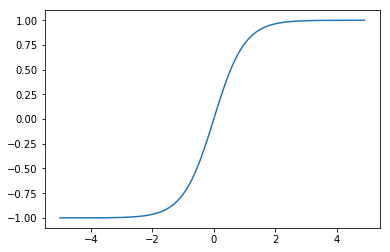

In [12]:
x = np.arange(-5.0, 5.0, 0.1)
y = np.tanh(x)
plt.plot(x, y)
plt.ylim(-1.1, 1.1)
plt.show()

### 步骤一  计算输入X
输入网络的第一个字母是“h”, 我们想要得到隐藏层状态，那么首先我们需要计算
![image](https://www.zhihu.com/equation?tex=W_%7Bxh%7Dx_t)



![image](https://pic2.zhimg.com/80/v2-e97f9dabaeed61846bed910a92638281_1440w.jpg)

![image](https://pic1.zhimg.com/80/v2-a5bd70373a49379c155a55f124686134_1440w.jpg)




通过矩阵相乘，我们得到

In [13]:
import numpy as np
import matplotlib.pylab as plt
one_hot =[[1, 0,  0, 0],
          [0, 1,  0, 0],
          [0, 0,  1, 0],
          [0, 0,  1, 0]]

wxh = [ [0.287027, 0.84606,  0.572392, 0.486813], 
      [0.902874, 0.871522, 0.691079, 0.18998], 
      [0.537524, 0.09224,  0.558159, 0.491528]]

xt = one_hot[0]
r1 = np.dot(wxh, xt)

print(r1)

[0.287027 0.902874 0.537524]



### 步骤二  计算隐藏状态S

现在我们看一下循环神经元, 权重[公式]是一个1x1的矩阵，值为0.427043，偏差也是1x1的矩阵，值为0.56700.

对于字母“h”，没有前一个状态，所以我们也可以认为前一个状态是[0,0,0,0]。

接下来计算

![image](https://www.zhihu.com/equation?tex=w_%7Bhh%7Dh_%7Bt-1%7D%2Bbias)


![image](https://pic1.zhimg.com/80/v2-34851f8a03663d8d57d96683431e53d0_1440w.jpg)


In [31]:
h_state =[[0, 0,  0, 0],
          [0, 0,  0, 0],
          [0, 0,  0, 0],
          [0, 0,  0, 0]]

h_0 = h_state[0]

whh = 0.427043
bias = 0.567001


r2 =  np.dot(whh, h_0) + bias 
r2 = r2[:-1]
print(r2)

[0.567001 0.567001 0.567001]


### 步骤三  求和然后使用tanh 激活函数
有了前两步，我们就可以计算当前循环神经元的状态了，根据以下公式

![image](https://www.zhihu.com/equation?tex=h_t+%3D+tanh%28W_%7Bhh%7Dh_%7Bt-1%7D%2BW_%7Bxh%7Dx_%7Bt%7D%29)

将前两步的结果代入公式即可得到当前步的状态，计算如下


![image](https://pic2.zhimg.com/80/v2-de56eaf660c4d6bf6341c99ddef037ad_1440w.jpg)

In [32]:
print(r1 + r2)
np.tanh(r1 + r2) 

[0.854028 1.469875 1.104525]


array([0.69316794, 0.89955361, 0.80211853])

# 实现RNN

In [1]:

txt_data = "abcdefghijklmnopqrstuvwxyz abcdefghijklmnopqrstuvwxyz abcdefghijklmnopqrstuvwxyz " # input data

chars = list(set(txt_data)) # split and remove duplicate characters. convert to list.

num_chars = len(chars) # the number of unique characters
txt_data_size = len(txt_data)

print("unique characters : ", num_chars) # You can see the number of unique characters in your input data.
print("txt_data_size : ", txt_data_size)

unique characters :  27
txt_data_size :  81


# One hot encoding

In [2]:
# one hot encode
char_to_int = dict((c, i) for i, c in enumerate(chars)) # "enumerate" retruns index and value. Convert it to dictionary
int_to_char = dict((i, c) for i, c in enumerate(chars))
print(char_to_int)
print("----------------------------------------------------")
print(int_to_char)
print("----------------------------------------------------")
# integer encode input data
integer_encoded = [char_to_int[i] for i in txt_data] # "integer_encoded" is a list which has a sequence converted from an original data to integers.
print(integer_encoded)
print("----------------------------------------------------")
print("data length : ", len(integer_encoded))

{'k': 0, 's': 1, 't': 2, 'n': 3, 'j': 4, 'b': 5, 'x': 6, 'l': 7, 'v': 8, 'm': 9, 'o': 10, 'p': 11, ' ': 12, 'e': 13, 'r': 14, 'y': 15, 'g': 16, 'w': 17, 'a': 18, 'h': 19, 'c': 20, 'i': 21, 'd': 22, 'q': 23, 'f': 24, 'u': 25, 'z': 26}
----------------------------------------------------
{0: 'k', 1: 's', 2: 't', 3: 'n', 4: 'j', 5: 'b', 6: 'x', 7: 'l', 8: 'v', 9: 'm', 10: 'o', 11: 'p', 12: ' ', 13: 'e', 14: 'r', 15: 'y', 16: 'g', 17: 'w', 18: 'a', 19: 'h', 20: 'c', 21: 'i', 22: 'd', 23: 'q', 24: 'f', 25: 'u', 26: 'z'}
----------------------------------------------------
[18, 5, 20, 22, 13, 24, 16, 19, 21, 4, 0, 7, 9, 3, 10, 11, 23, 14, 1, 2, 25, 8, 17, 6, 15, 26, 12, 18, 5, 20, 22, 13, 24, 16, 19, 21, 4, 0, 7, 9, 3, 10, 11, 23, 14, 1, 2, 25, 8, 17, 6, 15, 26, 12, 18, 5, 20, 22, 13, 24, 16, 19, 21, 4, 0, 7, 9, 3, 10, 11, 23, 14, 1, 2, 25, 8, 17, 6, 15, 26, 12]
----------------------------------------------------
data length :  81


In [11]:
# Not actually used.

onehot_encoded = []

for ix in integer_encoded: # ix is an index mapped to a unique character.
    letter = [0 for _ in range(len(chars))] # A list len is equal to the number of unique characters and whose elements are all zero.
    letter[ix] = 1 # 'letter' is a one-hot vector.
    onehot_encoded.append(letter) # Add a 1d list(a vector for one character).
onehot_encoded = np.array(onehot_encoded) # list to np-array   

print(onehot_encoded.shape)     #  = (len(data),len(chars))
print(onehot_encoded[0:4])
# invert encoding
inverted = int_to_char[np.argmax(onehot_encoded[0])] # "argmax" returns the index of the largest value. 
print(inverted)


(81, 27)
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]]
a


# Initialization

In [23]:
# hyperparameters

iteration = 500
sequence_length = 10
# batch_size = round((txt_data_size /sequence_length)+0.5) # = math.ceil
batch_size = 4
hidden_size = 100  # size of hidden layer of neurons.  
learning_rate = 1e-1


# model parameters

W_xh = np.random.randn(hidden_size, num_chars)*0.01     # weight input -> hidden. 
W_hh = np.random.randn(hidden_size, hidden_size)*0.01   # weight hidden -> hidden
W_hy = np.random.randn(num_chars, hidden_size)*0.01     # weight hidden -> output

b_h = np.zeros((hidden_size, 1)) # hidden bias
b_y = np.zeros((num_chars, 1)) # output bias

h_prev = np.zeros((hidden_size,1)) # h_(t-1)

# Forward propagation

![image](https://pic1.zhimg.com/80/v2-4058db6817f202ddc3fc41cb3683a744_1440w.png)


In [24]:
def forwardprop(inputs, targets, h_prev):
        
    # Since the RNN receives the sequence, the weights are not updated during one sequence.
    xs, hs, ys, ps = {}, {}, {}, {} # dictionary
    hs[-1] = np.copy(h_prev) # Copy previous hidden state vector to -1 key value.
    loss = 0 # loss initialization
    
    for t in range(len(inputs)): # t is a "time step" and is used as a key(dic).  
        
        xs[t] = np.zeros((num_chars,1)) 
        xs[t][inputs[t]] = 1
        
        hs[t] = np.tanh(np.dot(W_xh, xs[t]) + np.dot(W_hh, hs[t-1]) + b_h) # hidden state. 
        ys[t] = np.dot(W_hy, hs[t]) + b_y # unnormalized log probabilities for next chars
       
        ps[t] = np.exp(ys[t]) / np.sum(np.exp(ys[t])) # probabilities for next chars. 
        # Softmax. -> The sum of probabilities is 1 even without the exp() function, but all of the elements are positive through the exp() function.
 
        loss += -np.log(ps[t][targets[t],0]) # softmax (cross-entropy loss). Efficient and simple code

#         y_class = np.zeros((num_chars, 1)) 
#         y_class[targets[t]] =1
#         loss += np.sum(y_class*(-np.log(ps[t]))) # softmax (cross-entropy loss)        

    return loss, ps, hs, xs 

## 损失函数
![image](https://pic4.zhimg.com/80/v2-4518c23614c9208abdffab055ab88333_1440w.png)

# Backward propagation

[反向传播 推到过程](https://zhuanlan.zhihu.com/p/79657669)

![image](https://www.zhihu.com/equation?tex=%5Cfrac%7B%5Cpartial+J%7D%7B%5Cpartial+out%7D+%5CRightarrow+%5Cleft+%5C%7B%5Cbegin%7Bmatrix%7D+++++%5Cfrac%7B%5Cpartial+J%7D%7B%5Cpartial+W_%7BL%2B1%7D%7D%3DZ_L%5ET%5Cfrac%7B%5Cpartial+J%7D%7B%5Cpartial+out%7D+%5C%5C+++++%5Cfrac%7B%5Cpartial+J%7D%7B%5Cpartial+Z_%7BL%7D%7D%3D%5Cfrac%7B%5Cpartial+J%7D%7B%5Cpartial+out%7DW_%7BL%2B1%7D%5ET+%5C%5C+++++%5Cleft%28%5Cfrac%7B%5Cpartial+J%7D%7B%5Cpartial+b%7D%5Cright%29%5E%7BT%7D%3DSumCol%28%5Cfrac%7B%5Cpartial+J%7D%7B%5Cpartial+out%7D%29+%5C%5C+++++W_%7BL%2B1%7D%5E%7Bt%2B1%7D+%3D+W_%7BL%2B1%7D%5Et-%5Ceta+%5Cfrac%7B%5Cpartial+J%7D%7B%5Cpartial+W_%7BL%2B1%7D%7D+%5C%5C+++++b_%7BL%2B1%7D%5E%7Bt%2B1%7D+%3D+b_%7BL%2B1%7D%5Et-%5Ceta+%5Cfrac%7B%5Cpartial+J%7D%7B%5Cpartial+b_%7BL%2B1%7D%7D+%5Cend%7Bmatrix%7D+%5Cright.+%5CRightarrow+%5Cfrac%7B%5Cpartial+J%7D%7B%5Cpartial+h_L%7D%3D%5Cfrac%7B%5Cpartial+J%7D%7B%5Cpartial+Z_L%7D%5Cfrac%7B%5Cpartial+Z_L%7D%7B%5Cpartial+h_L%7D+%5CRightarrow+%5Cleft+%5C%7B%5Cbegin%7Bmatrix%7D++++++%5Cfrac%7B%5Cpartial+J%7D%7B%5Cpartial+W_%7BL%7D%7D%3DZ_%7BL-1%7D%5ET%5Cfrac%7B%5Cpartial+J%7D%7B%5Cpartial+h_L%7D+%5C%5C+++++%5Cfrac%7B%5Cpartial+J%7D%7B%5Cpartial+Z_%7BL-1%7D%7D%3D%5Cfrac%7B%5Cpartial+J%7D%7B%5Cpartial+h_L%7DW_%7BL%7D%5ET+%5C%5C+++++%5Cvdots+%5C%5C+++++%5Cvdots++%5Cend%7Bmatrix%7D%5Cright.+%5CRightarrow+%5Ccdots+)

In [25]:
def backprop(ps, inputs, hs, xs):

    dWxh, dWhh, dWhy = np.zeros_like(W_xh), np.zeros_like(W_hh), np.zeros_like(W_hy) # make all zero matrices.
    dbh, dby = np.zeros_like(b_h), np.zeros_like(b_y)
    dhnext = np.zeros_like(hs[0]) # (hidden_size,1) 

    # reversed
    for t in reversed(range(len(inputs))):
        dy = np.copy(ps[t]) # shape (num_chars,1).  "dy" means "dloss/dy"
        dy[targets[t]] -= 1 # backprop into y. After taking the soft max in the input vector, subtract 1 from the value of the element corresponding to the correct label.
        dWhy += np.dot(dy, hs[t].T)
        dby += dy 
        dh = np.dot(W_hy.T, dy) + dhnext # backprop into h. 
        dhraw = (1 - hs[t] * hs[t]) * dh # backprop through tanh nonlinearity #tanh'(x) = 1-tanh^2(x)
        dbh += dhraw
        
        dWxh += np.dot(dhraw, xs[t].T)
        dWhh += np.dot(dhraw, hs[t-1].T)
        dhnext = np.dot(W_hh.T, dhraw)
    for dparam in [dWxh, dWhh, dWhy, dbh, dby]: 
        np.clip(dparam, -5, 5, out=dparam) # clip to mitigate exploding gradients.  
    
    return dWxh, dWhh, dWhy, dbh, dby

# Training

In [26]:
data_pointer = 0

# memory variables for Adagrad
mWxh, mWhh, mWhy = np.zeros_like(W_xh), np.zeros_like(W_hh), np.zeros_like(W_hy)
mbh, mby = np.zeros_like(b_h), np.zeros_like(b_y) 


for i in range(iteration):
    h_prev = np.zeros((hidden_size,1)) # reset RNN memory
    data_pointer = 0 # go from start of data
    
    # batch_size 没有并行计算， 如果用tf， 可以并行计算
    for b in range(batch_size):
        
        inputs = [char_to_int[ch] for ch in txt_data[data_pointer:data_pointer+sequence_length]]
        targets = [char_to_int[ch] for ch in txt_data[data_pointer+1:data_pointer+sequence_length+1]] # t+1        
            
  
        if (data_pointer+sequence_length+1 >= len(txt_data) and b == batch_size-1): # processing of the last part of the input data. 
#             targets.append(char_to_int[txt_data[0]])   # When the data doesn't fit, add the first char to the back.
            targets.append(char_to_int[" "])   # When the data doesn't fit, add space(" ") to the back.


        # forward
        loss, ps, hs, xs = forwardprop(inputs, targets, h_prev)
#         print(loss)
    
        # backward
        dWxh, dWhh, dWhy, dbh, dby = backprop(ps, inputs, hs, xs) 
        
        
    # perform parameter update with Adagrad
        for param, dparam, mem in zip([W_xh, W_hh, W_hy, b_h, b_y], 
                                    [dWxh, dWhh, dWhy, dbh, dby], 
                                    [mWxh, mWhh, mWhy, mbh, mby]):
            mem += dparam * dparam # elementwise
            param += -learning_rate * dparam / np.sqrt(mem + 1e-8) # adagrad update      
    
        data_pointer += sequence_length # move data pointer
        
    if i % 200 == 0:
        print ('iter %d, loss: %f' % (i, loss)) # print progress



[18, 5, 20, 22, 13, 24, 16, 19, 21, 4]
iter 0, loss: 61.347369
iter 200, loss: 0.046441
iter 400, loss: 0.019800


# Prediction

In [16]:
def predict(test_char, length):
    x = np.zeros((num_chars, 1)) 
    x[char_to_int[test_char]] = 1
    ixes = []
    h = np.zeros((hidden_size,1))

    for t in range(length):
        h = np.tanh(np.dot(W_xh, x) + np.dot(W_hh, h) + b_h) 
        y = np.dot(W_hy, h) + b_y
        p = np.exp(y) / np.sum(np.exp(y)) 
        ix = np.random.choice(range(num_chars), p=p.ravel()) # ravel -> rank0
        # "ix" is a list of indexes selected according to the soft max probability.
        x = np.zeros((num_chars, 1)) # init
        x[ix] = 1 
        ixes.append(ix) # list
    txt = ''.join(int_to_char[i] for i in ixes)
    print ('----\n %s \n----' % (txt, ))

In [17]:
predict('a',30) # (char, len of output)

----
 bcdefghijklmnopqrstuvwxyz abcd 
----


In [18]:
predict('b',30)

----
 cdefghijklmnopqrstuvwxyz abcde 
----
